# CS 105 Team 7 Mini Project Report

[]

[]

1. What data do you have? (Your answer)
2. What would you like to know? (Your answer)
3. Explore, present and analyze the data. (Generate statistics, perform visualizations)
4. Can you state any hypotheses or make predictions? Which tests can you apply to
5. Verify your hypothesis? (Your answer).
6. Test your hypotheses. Draw the conclusions.
7. Draw the overall conclusion



In [ ]:
#test 1, lets cook

In [ ]:
#Lydia's Chunk: Heatmap Visualization
# Comparing the on campus choice of food vs scale of imposter syndrome (1-5)
# On campus food choice: EV - FE
    # Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Subway]
    # Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Habit Burger]
# Imposter syndrome: DM
    # The National Library of Medicine defines imposter syndrome as, " a behavioral health phenomenon described as self-doubt of intellect, skills, or accomplishments among high-achieving individuals" ("Imposter Phenomenon", 2023). Based on this definition please rate your level of imposter syndrome through your journey in your major.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('responses.csv')
IS_scale_col = df['The National Library of Medicine defines imposter syndrome as, " a behavioral health phenomenon described as self-doubt of intellect, skills, or accomplishments among high-achieving individuals" ("Imposter Phenomenon", 2023). Based on this definition please rate your level of imposter syndrome through your journey in your major. ']
IS_scale_col.name = "Imposter_Syndrome_Scale"
# print(IS_scale_col.head()) # test print

# create a subset to extract the questions
# then rename the columns
rest_rating_cols = df[[c for c in df.columns if "Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often)." in c]]
rest_rating_cols.columns = rest_rating_cols.columns.str.extract(r'\[(.*)\]')[0]
# print(rest_rating_cols.columns.tolist()) # test print


In [27]:
# convert to numeric
# rest_rating_cols.head() # test print
rest_rating_cols = rest_rating_cols.apply(lambda col: col.astype(str).str.split(' - ').str[0])
rest_rating_cols = rest_rating_cols.apply(pd.to_numeric, errors='coerce')
rest_rating_cols.head() # test print


,Subway,Habit Burger,Panda Express,Chronic Tacos,Hibachi-san,Halal Shack,The Barns,Scotty convenient store,Dining hall (Glasgow and Lothian)
0,1,1,3,1,3,1,1,3,3
1,2,2,2,2,2,1,1,3,1
2,1,1,1,1,1,1,1,1,1
3,3,1,2,1,1,1,1,5,1
4,1,1,1,2,1,1,1,2,1


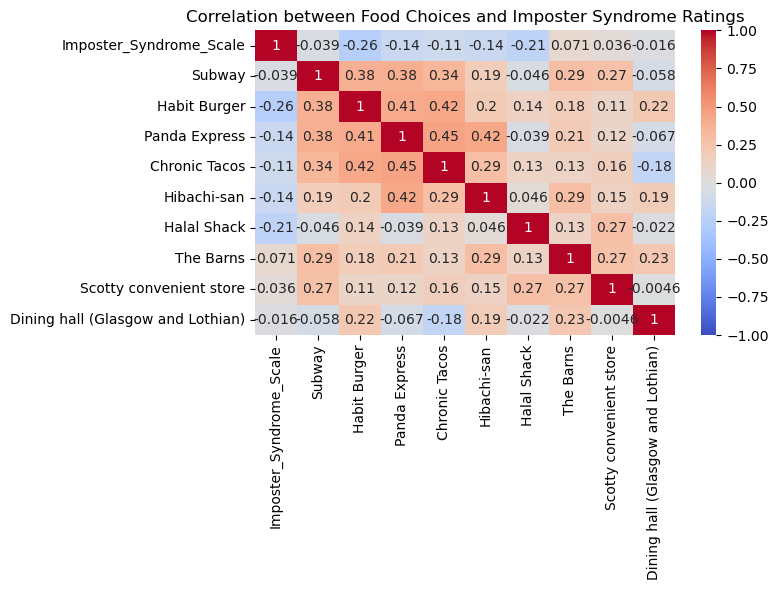

In [28]:
combined_df = pd.concat([IS_scale_col, rest_rating_cols], axis=1)

# ---- Convert to numeric (if not already) ----
combined_df = combined_df.apply(pd.to_numeric, errors='coerce')

# ---- Create correlation matrix ----
corr = combined_df.corr()

# ---- Plot heatmap ----
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation between Food Choices and Imposter Syndrome Ratings")
plt.tight_layout()
plt.show()

In [30]:
# fav cuisine vs restaurant preference
    # Please rank the following cuisines by your preference. (1 being dislike, 5 being like)
fav_cuisine = df[[c for c in df.columns if "Please rank the following cuisines by your preference. (1 being dislike, 5 being like)" in c]]
fav_cuisine.columns = fav_cuisine.columns.str.extract(r'\[(.*)\]')[0]
# print(fav_cuisine.columns.tolist())
# convert to numeric
# rest_rating_cols.head() # test print
fav_cuisine = fav_cuisine.apply(lambda col: col.astype(str).str.split(' - ').str[0])
fav_cuisine = fav_cuisine.apply(pd.to_numeric, errors='coerce')
fav_cuisine.head() # test print


,Chinese food,Japanese food,Korean food,Indian food,Vietnamese food,American food,Italian food,Mexican food,Mediterranean food,Fusion / Modern mix cuisine,Other Cuisine (please specify in the next question)
0,5,5,5,5,5,5,5,5,5,4,5
1,5,5,5,5,5,5,5,5,5,2,1
2,5,5,5,3,4,4,4,3,3,3,3
3,5,5,5,5,5,4,5,5,4,4,3
4,3,4,4,5,3,3,5,5,5,4,5


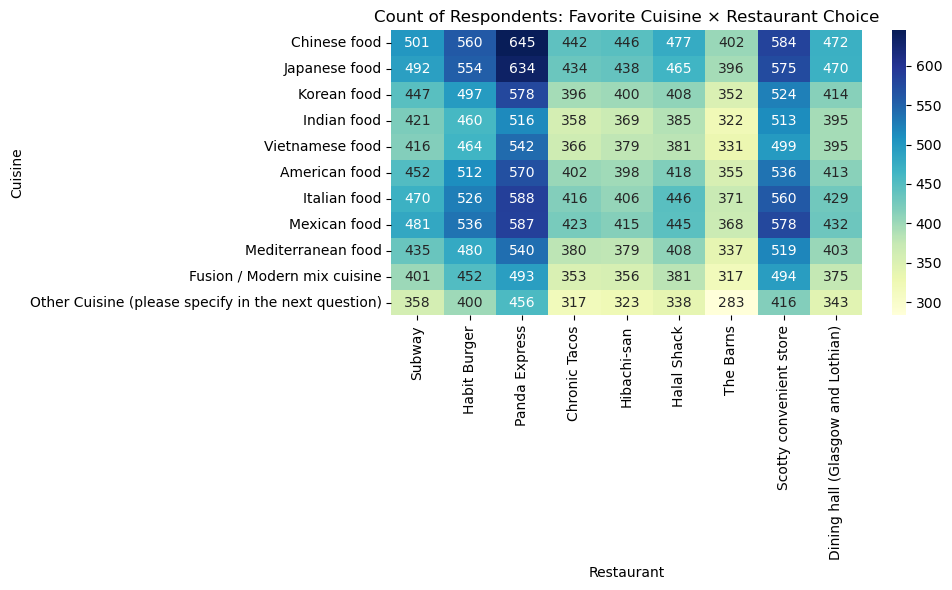

In [41]:
# combined_df2 = pd.concat([fav_cuisine, rest_rating_cols], axis=1)

# # ---- Convert to numeric (if not already) ----
# combined_df2 = combined_df2.apply(pd.to_numeric, errors='coerce')

# # ---- Create correlation matrix ----
# corr = combined_df2.corr()

# # ---- Plot heatmap ----
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
# plt.title("Correlation between Food Choices and Imposter Syndrome Ratings")
# plt.tight_layout()
# plt.show()

count_matrix = fav_cuisine.T.dot(rest_rating_cols)

# --- Plot as heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(count_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Count of Respondents: Favorite Cuisine × Restaurant Choice")
plt.xlabel("Restaurant")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

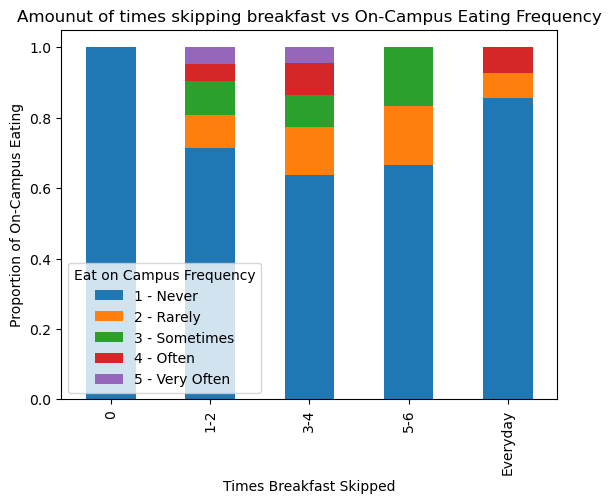

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("responses.csv")
table2 = pd.crosstab(df["How many days per week do you skip breakfast?"], df["Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Dining hall (Glasgow and Lothian)]"], normalize="index")

table2.plot(kind="bar", stacked=True)
plt.title("Amounut of times skipping breakfast vs On-Campus Eating Frequency")
plt.ylabel("Proportion of On-Campus Eating")
plt.xlabel("Times Breakfast Skipped")
plt.legend(title="Eat on Campus Frequency")
plt.show
